# Orbital Congestion
---
**Milestone 1 Project - SIADS 591 & 592**
<br>January X, 2021

*Project Team:*<br>
Tim Chen (ttcchen@umich.edu), Sophie Deng (sophdeng@umich.edu), and Nicholas Miller (nmill@umich.edu)

*Instructional Team:*<br>
Elle O'Brien (elleobri@umich.edu), Chris Teplovs (cteplovs@umich.edu), and Anthony Whyte (arwhyte@umich.edu)

---
<a id="table-of-contents"></a>
## 1. Table of Contents

*Note to Team: Table of Contents needs to be manually updated if the order or headers change below.  Please keep this in mind when making changes*

1. [Table of Contents](#table-of-contents)
2. [Motivation](#motivation)
3. [Brief Introduction to Orbital Mechanic](#intro)
4. [Data Sources](#data-sources)
  1. [Space-Track.org](#ds-spacetrack)
  2. [SCORATES](#ds-socrates)
5. [Data Manipulation Methods](#data-manipulation)
  1. [Space-Track.org API](#dm-spacetrack)
  2. [SOCRATES Web Scrapper](#dm-socrates)
  3. [Satellite Break-Up PDF](#dm-breakup-pdf)
  4. [Satellite CZML Generator for Cesium](#dm-cesium)
6. [Analysis and Visualization](#analysis-visualization)
  1. [Satellite Congestion History](#av-history)
  2. [Collisions and Near Misses](#av-collisions)
  3. [Maneuvers](#av-maneuvers)
  4. [Starlink and Future Super Satellite Clusters](#av-starlink)
7. [Conclusion](#conclusion)
8. [Statement of Work](#sow)
9. [Glossary](#glossary)

---
<a id="motivation"></a>
## 2. Motivation

*Note to Team: this was copy pasted from our proposal*

Space, and more specifically low-earth orbit, is about to get a whole lot busier and this is making many concerned.  At present, there are about 2,000 operational satellites in low-earth orbit and more than double that in defunct satellites.  But last year in October, SpaceX requested permission to launch 30,000 Starlink satellites into low-earth orbit.  This is in addition to the 12,000 that already received approval.  These satellites have already begun interrupting astronomical observations, creating light pollution and increasing collision risks in an environment where a collision could trigger a chain reaction which not only endangers current and future satellites but also human lives. 

For our project, we will be looking into the present situation with satellite counts, ownership, purpose, and their corresponding orbits.  We will use visualization techniques such as spatial density charts, gabbard diagrams, and animated time series charts to illustrate orbital congestion and highlight intersecting orbits that have the potential for collision.  In addition to satellite data, we will explore debris in space.  Using this data, we intend to investigate several questions and present an analysis that can be used for future work.

[Back to Top](#table-of-contents)

---
<a id="intro"></a>
## 3. Brief Introduction to Orbital Mechanic

*NOTE to Team: images stored in `images/`*

The following are a few terms that will be used in this document. For a comprehensive list, please check the [glossary](#glossary).

![Oribital Mecahnic Terms](images/orbit_terms.png "Oribital Mecahnic Terms")

[Back to Top](#table-of-contents)

---
<a id="data-sources"></a>
## 4. Data Sources

<a id="ds-spacetrack"></a>
### A. Space-Track.org
| Data Source 1 | Space-Track.org |
|:--|:--|
| *Name* | Satellite Catalog and ELSET data provided by the Combined<br>Force Space Component Command's 18th Space Control Squadron |
| *Size of Data* | Almost 50,000 cataloged objects in space, their metadata,<br>and multiple daily historical ELSET data. |
| *Location* | https://www.space-track.org/documentation#api |
| *Format* | CSV<br>Two-Line Element (TLE)<br>Orbit Mean-Elements Message (OMM) |
| *Access Method* | Direct download, API Access, or open source Libraries<br>More details below. |

Space-Track.org contains a number of vaste historic and up-to-date datasets for satellite tracking that can be accessed via an API.  The following Request Classes were used for this project:

| Request Class | Description |
|:--|:--|
| `gp` | The general perturbations (GP) class is an efficient listing of the newest<br>SGP4 keplerian element set for each man-made earth-orbiting object tracked by the<br>18th Space Control Squadron |
| `gp_history` | Listing of ALL historical SGP4 keplerian element sets for each man-made<br>earth-orbiting object by the 18th Space Control Squadron. |
| `satcat` | Satellite Catalog Information |
| | *Further information can be found here:*<br> https://www.space-track.org/documentation#/api |

To access Space-Track.org data, you need login credentials via a free account that can be created here: https://www.space-track.org/auth/createAccount.  Once you have an account, the API can be accessed via an online [query builder](https://www.space-track.org/#/queryBuilder) or via a python package such as [spacetrack](https://pypi.org/project/spacetrack/).  Both of these methods were used for this project.

<a id="ds-socrates"></a>
### B. SCORATES (Satellite Orbital Conjunction Reports Assessing Threatening Encounters in Space)
| Data Source 2 | Satellite Conjunctions Predictions (SOCRATES) |
|:--|:--|
| *Name* | Satellite Orbital Conjunction Reports Assessing Threatening<br>Encounters in Space |
| *Size of Data* | Up to 1,000 entries of predicted satellite or debris conjunction entries<br>for the next 7 days. |
| *Location* | https://celestrak.com/SOCRATES/ |
| *Format* | HTML |
| *Access Method* | Web scraping to CSV files |

SOCRATES calculates the likelihood two satellites will collide based on recent satellite location and orbit via TLE data.  The website displays upto 1000 satellite pairs based on either maximum probability of collision, minimum distance between satellites or sorted time of closest approach.

[Back to Top](#table-of-contents)

---
<a id="data-manipulation"></a>
## 5. Data Manipulation Methods

<a id="dm-spacetrack"></a>
### A. Space-Track.org API
*Tim to fill in*

<a id="dm-socrates"></a>
### B. SOCRATES Web Scrapper
*Nick to fill in*

<a id="dm-breakup-pdf"></a>
### C. Satellite Break-Up PDF
*Sophie to fill in*

<a id="dm-cesium"></a>
### D. Satellite CZML Generator for Cesium
*Nick to fill in*

[Back to Top](#table-of-contents)

---
<a id="analysis-visualization"></a>
## 6. Analysis and Visualization

A dashboard was created to summarize and present, in an accessible way, some of the complex visuals created by the team.  The dashboard can be accessed either online via Heroku or by runing the below script.  Both options use the same source code and data sources.

[oc-dash.herokuapp.com/](https://oc-dash.herokuapp.com/)

- *NOTE: do to resource limitations on the free version of Heroku, please limit the filtering to one week or less of data.*

In [3]:
# Run the dashboard locally
import os
os.chdir('./dashboard')
exec(open('./app.py').read())
os.chdir('..')

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


- *NOTE: Be sure to interrrupt the kernal to stop the local dashboard and continue execution of the notebook*

Below are the details of our analysis.

<a id="av-history"></a>
### A. Satellite Congestion History

*Sophie's timeseries graphics + annotations*

*Nick's spatial graphics / animation*

<a id="av-collisions"></a>
### B. Collisions and Near Misses

*Tim's Gabbard charts / annimations of past collisions*

*Nick's SOCRATES Intercepts with Cesium*
###  Collisions
Collisions between objects in space are hypervelocity collisions where the velocity (v) of the impactor (relative to the target) is so great that its kinetic energy ( K = ½ m v2) is greater than the energy released in the detonation of the same mass (m) of high explosive.

In low Earth orbit, the velocity of a satellite is between 7 and 8 km/sec and the typical collision velocity between two space objects in LEO is around 10 km/sec. Most accidental LEO collisions are hypervelocity collisions. The deliberate destruction of a satellite with a launched missile is also a hypervelocity collision. A hypervelocity collision may be categorised as catastrophic or non-catastrophic. A catastrophic impact results both the target and the impactor are totally destroyed while in a non-catastrophic event, the impactor is detroyed and the target is damaged, but not totally destroyed.

Fragment ejected from the collision will have a new orbit dependent upon the magnitude of the ejection velocity and the direction of this velocity vector with respect to the velocity vector of the satellite at the time of collision. If the velocity is in the same direction as the original target motion, the initial orbit will be turned into a larger elliptial orbit. On the other hand, if the velocity is in the opposite direction, the final orbit will become smaller than initail orbit. This is illustrated in the figure below:

Reference: https://www.spaceacademy.net.au/watch/debris/collision.htm

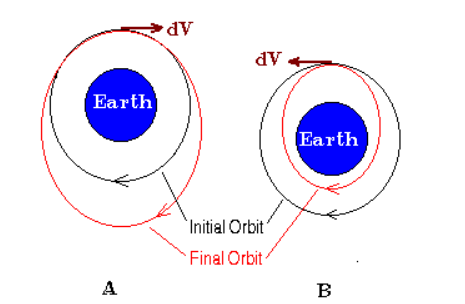

### Gabbard Diagram
John Gabbard developed a diagram for illustrating the orbital changes and the orbital decay of debris fragments. A Gabbard diagram is a scatter plot of height versus period. The apogee and perigee of each ejected fragment is shown as a point on the diagram.

### FengYun-1C Anti-satellite Missile Test
On 11 January 2007, a non-operational Chinese weather satellite, the Fengyun-1C (FY-1C) was destroyed by a payload (a kinetic kill vehicle) traveling with a speed of 8 km/s in the opposite direction at an altitude of 863 km.

Below Gabbard diagram illustrates the aftermath of this collision: 
1) 3526 pieces of debris of trackable sizes are documented and 646 have decayed.

2) The cross sign (x) marked the location of collision at the altitude of 863km which is low earth orbit(LEO). when a collision happens at a low altitude, some of the fragments ejected in the opposite direction to the original motion will be forced into orbits with a perigee below the Earth's surface. As a result, these fragments with smaller mass will generally burn up during reentry. Those of bigger mass tend to decay later due to atmospheric drag.

3) Fragments with a perigee of less than about 100 km will encounter so much air resistance that they will never make it back to apogee, and will deorbit in less than one period. This explains the decay objects on the bottom left of the graph (purple and orange points) and the progessive drop in apogee as the period gets smaller.

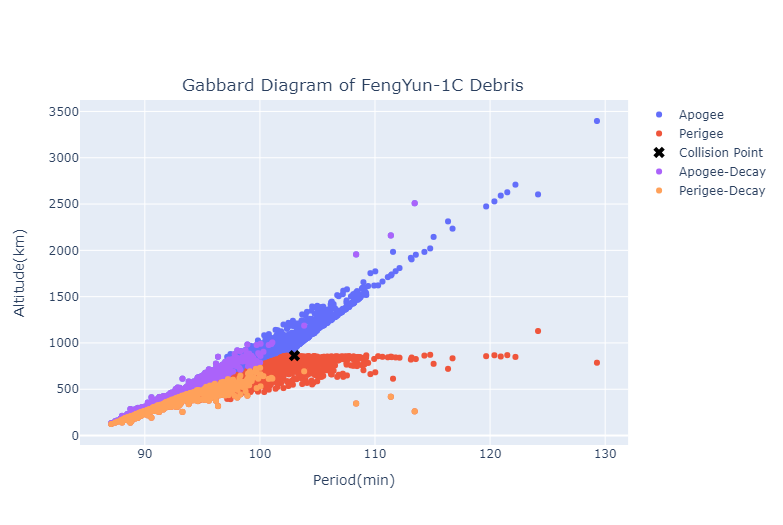


<a id="av-maneuvers"></a>
### C. Maneuvers

*Tim's section*

<a id="av-starlink"></a>
### D. Starlink and Future Super Satellite Clusters

*Nick + who ever can help*

[Back to Top](#table-of-contents)

---
<a id="conclusion"></a>
## 7. Conclusion
*Not sure what to write here*

[Back to Top](#table-of-contents)

---
<a id="sow"></a>
## 8. Statement of Work

The team divided the work for this project in the following ways:

| Name | Activity |
|:--|:--|
| Tim Chen | <ul><li>Maneuver Detection</li><li>Gabbard Collision Animations</li><li>*Placeholder*</li></ul> |
| Sophie Deng | <ul><li>Satellite Break-up PDF Parsing</li><li>Satellite Congestion History Charts</li><li>*Placeholder*</li></ul> |
| Nicholas Miller | <ul><li>Spatial Density Plots</li><li>Dashboard + `satellite_czml` python package</li><li>SOCRATES Data Scrapper</li><li>*Placeholder*</li></ul> |

[Back to Top](#table-of-contents)

---
<a id="glossary"></a>
## 9. Glossary

- **Apoapsis/Apogee** - The point on an elliptical orbit furthest from the earth.  Note: The true definitions for these words are slightly different but carry a similiar meaning.
- **Periapsis/Perigee** - The point on an elliptical orbit closest to the earth.  Note: The true definitions for these words are slightly different but carry a similiar meaning.
- **TLE (Two-Line Element set)** - Satellite position and orbit trajectory data format.  Frequently updated to reflect changes caused by natural effects like drag or unnatural effects like maneuvers.